# Quantum Cellular Automata: Examples -- Logan Hillberry

In [66]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package

from qca import QCA
from states import make_state
import measures as ms
from figures import draw_MI

from copy import copy
from os import makedirs

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

from matplotlib import rc
fontstyle = {
    "pdf.fonttype": 42,
    "text.usetex": True,
    "text.latex.preamble":r"\usepackage{amsfonts}",
    "font.family": "serif",
    "font.size": 20}
plt.rcParams.update(fontstyle)
rc('mathtext', default='regular')
rc("text", usetex=True)
der = r"/home/lhillber/documents/research/cellular_automata/qeca/qca/data/"

In [67]:
# Location to save/load data
der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"

In [68]:
# reload if changing source code
def reimport():
    import qca
    import networkviz
    import core
    import matrix
    from importlib import reload
    import figures
    reload(figures)
    reload(qca)
    reload(networkviz)
    reload(ms)
    reload(core)
    reload(matrix)
    from qca import QCA
reimport()

In [69]:
reimport()
def network_measures_plot(Qs, Cref=None, Yref=None, order=2, label="R", reflabel="PT", tmin=1, logC=False, logY=False, logt=False):
    fig, axs = plt.subplots(2,1, sharex=True)
    for Q in Qs:
        axs[0].plot(Q.ts[tmin:], Q.C(order)[tmin:])
        axs[0].set_ylabel(r"$\mathcal{C}$")
        axs[1].plot(Q.ts[tmin:], Q.Y(order)[tmin:], label=f"{label}= {getattr(Q, label)}")
        axs[1].set_ylabel(r"$\mathcal{Y}$")
        axs[1].set_xlabel(r"Time, $t$")
    if Cref is not None:
        axs[0].axhline(Cref, label=reflabel, c="k")
    if Yref is not None:
        axs[1].axhline(Yref, label=reflabel, c="k")
    if logC:
        axs[0].set_yscale("log")
    if logY:
        axs[1].set_yscale("log")
    if logt:
        axs[0].set_xscale("log")
        axs[1].set_xscale("log")
    axs[1].legend(loc="center", bbox_to_anchor=(1.15, 1.15))

In [70]:
# Constant Parameters:
L = 16
Lx = 4
T = 100.0
dt = 1.0
R = 2
r = 1
V = "H"
E = 0.01
N = 100
totalistic = True
hamiltonian= False

# Porter Thomas state for comparison
PTstate = make_state(L, "P123")
rhoj = ms.get_rhoj(PTstate)
PT_MI =  ms.get_MI_from_state(PTstate, order=2)
PT_pagecurve = ms.get_entropy(ms.get_bipart(PTstate), order=2)
PT_C = ms.network_clustering(PT_MI)
PT_Y = ms.network_disparity(PT_MI)

# Totalistic QCA in 1D

In [71]:
# Parameters template
BC = "1-00"
IC = "f0"

params = dict(
              L=L,
              T=T,
              dt=dt,
              r=r,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              totalistic=totalistic,
              hamiltonian=hamiltonian)

In [72]:
# Generate data and store as an array of QCA objects
reimport()
Rs = [1, 2] # totalistic rule 2 = T_6
Qs = []
Fs = []
for R in Rs:
    p1 = copy(params)
    p1["R"] = R
    p2 = copy(p1)
    p2["E"] = E
    p2["N"] = N
    #Q2 = QCA(p2, der=der)
    Q1 = QCA(p1, der=der)
    Q1.run(tasks=["rhoj", "rhojk"], verbose=False)
    #F = Q2.F(save=True)
    Qs.append(Q1)
Qs = np.asarray(Qs)

<AxesSubplot:xlabel='Site $j$', ylabel='Time $t$'>

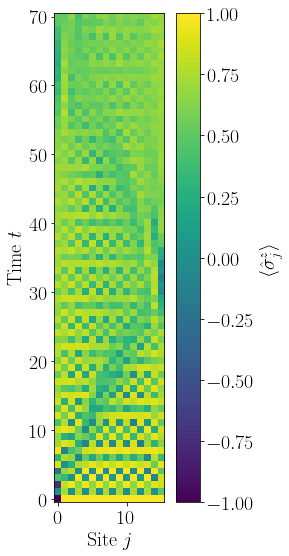

In [73]:
Qs[0].plot("exp_Z", tmax=70, figsize=(4,9), stride=1)

# Cross neighborhood (4-neighbor 2D QCA)

## One initial excitation

In [74]:
reimport()
from figures import grid_animation, network_animation
# Parameters template
IC = "f0"
Rs = [2, 6, 10, 18, 26] # 1, 1+2, 1+3, 1+4, 1+3+4
BC = "1-0000"
tris = "0"    # enable cross n/eighborhoods

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [75]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [76]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/cross_R4-12-20-28_exp_Z.mp4")
HTML(ani.to_html5_video())

In [77]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/cross_R4-12-20-28_s_2.mp4")
HTML(ani.to_html5_video())

ValueError: Received invalid argument(s): alphs

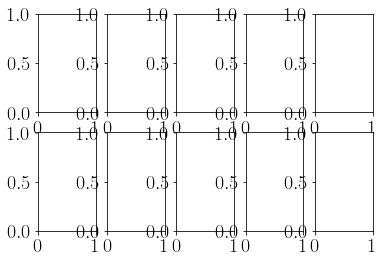

In [78]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/cross_R4-12-20-28_network.mp4")
HTML(ani.to_html5_video())

In [ ]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)

## Two initial excitations

In [422]:
# Parameters template
IC = "f1-2"
Rs = [4, 12, 20, 28] # 2, 2+3, 2+4, 2+3+4
BC = "1-0000"
tris = "0"    # enable cross neighborhoods

params = dict(
              L=4,
              Lx=2,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [423]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [424]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/cross_R4-12-20-28_exp_Z.mp4")
HTML(ani.to_html5_video())

In [425]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/cross_R4-12-20-28_s_2.mp4")
HTML(ani.to_html5_video())

In [426]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/cross_R4-12-20-28_network.mp4")
HTML(ani.to_html5_video())

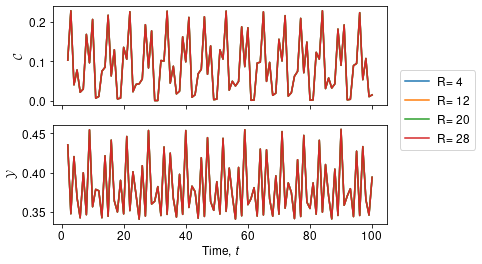

In [428]:
network_measures_plot(Qs, tmin=2, logC=False)

## Four initial excitations -- a

In [454]:
# Parameters template
IC = "f1-4-11-14"
Rs = [4, 12, 20, 28] # 2, 2+3, 2+4, 2+3+4
BC = "1-0000"
tris = "0"    # enable cross neighborhoods

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [455]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [431]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/cross_R4-12-20-28_exp_Z.mp4")
HTML(ani.to_html5_video())

In [432]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/cross_R4-12-20-28_s_2.mp4")
HTML(ani.to_html5_video())

In [456]:
# try layout = spring, spectral, or grid
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/cross_R4-12-20-28_network.mp4")
HTML(ani.to_html5_video())

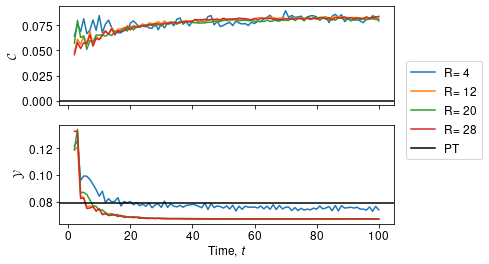

In [457]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=False)
# plt.savefig("../figuresi/cross_R4-12-20-28_net-measures.pdf")

## Four initial excitations -- b

In [435]:
# Parameters template
IC = "f0-6-9-15"
Rs = [4, 12, 20, 28] # 2, 2+3, 2+4, 2+3+4
BC = "1-0000"
tris = "0"    # enable cross neighborhoods

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [436]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [437]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/cross_R4-12-20-28_exp_Z.mp4")
HTML(ani.to_html5_video())

In [438]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/cross_R4-12-20-28_s_2.mp4")
HTML(ani.to_html5_video())

In [439]:
# try layout = spring, spectral, or grid
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/cross_R4-12-20-28_network.mp4")
HTML(ani.to_html5_video())

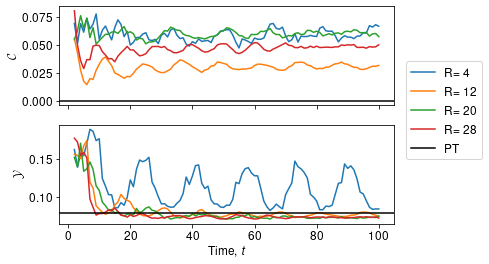

In [440]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=False)
# plt.savefig("../figuresi/cross_R4-12-20-28_net-measures.pdf")

# Triangle neighborhoods (2-neighbor 2D QCA)

## Parity - one trianlge

In [333]:
tris = "3"  # enable triangular neighborhoods
BC = "1-00"
Rs = [1, 2, 6]
IC = "f0"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False)

In [339]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False, recalc=False)
    Qs.append(Q)

In [335]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [336]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [337]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

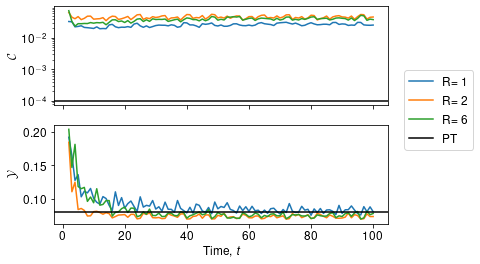

In [338]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)
#plt.savefig("../figures/tri-1_R1-2-6_net-measures.pdf")

## Parity - two triangles

### One initial excitation

In [7]:
reimport()
#tris = "13"  # enable rotating triangular neighborhoods
tris = "13_24" 
Rs = [1, 2, 6]
BC = "1-00"
IC = "f0"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [8]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=True)
    Qs.append(Q)


Rank: 0
Updated: 099e3ea09c428771c64f809be435c941c9249c31
with ['rhoj', 'rhojk']
Parameters: {'L': 16, 'Lx': 4, 'T': 100.0, 'dt': 1.0, 'R': 1, 'r': 1, 'V': 'H', 'IC': 'f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[1, 3], [2, 4]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': False, 'totalistic': True, 'hamiltonian': False, 'recalc': False, 'tasks': ['rhoj', 'rhojk'], 'Ly': 4, 'rank': 0, 'nprocs': 1}
total file size: 3.21 MB
took: 22.36 s
data at:
/home/lhillber/documents/research/cellular_automata/qeca/qca/data/099e3ea09c428771c64f809be435c941c9249c31.hdf5


Rank: 0
Updated: 4e94e9c7dcca0a1bf965accffd9e078696ade831
with ['rhoj', 'rhojk']
Parameters: {'L': 16, 'Lx': 4, 'T': 100.0, 'dt': 1.0, 'R': 2, 'r': 1, 'V': 'H', 'IC': 'f0', 'BC': '1-00', 'E': 0.0, 'N': 1, 'thread_as': 'product', 'trotter': True, 'tris': [[1, 3], [2, 4]], 'blocks': [0], 'rods': [[0], [0]], 'symmetric': False, 'totalistic': True, 'hamiltonian': False, 'recalc': False, 'tas

In [9]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [10]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [11]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

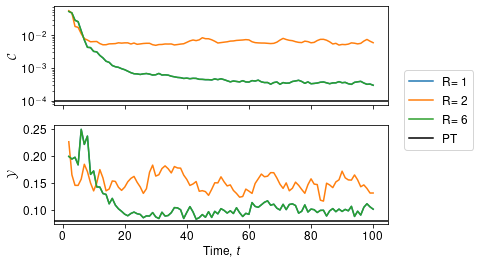

In [12]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)
# plt.savefig("../figures/tri-1_R1-2-6_net-measures.pdf")

### Two initial excitations

In [13]:
reimport()
#tris = "13"  # enable rotating triangular neighborhoods
tris = "13_24" 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f6-9"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [14]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [15]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [16]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [17]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

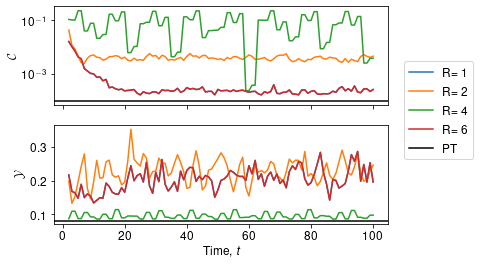

In [18]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)
# plt.savefig("../figures/tri-1_R1-2-6_net-measures.pdf")

### Four initial excitations -- a

In [25]:
reimport()
#tris = "13"  # enable rotating triangular neighborhoods
tris = "13_24" 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f1-4-11-14"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [26]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [27]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [28]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [29]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

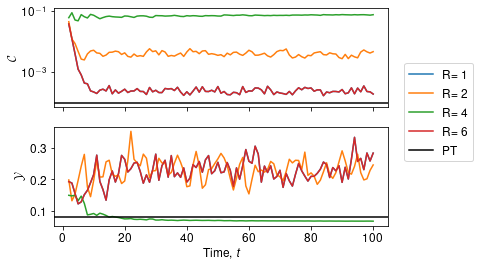

In [30]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)
# plt.savefig("../figures/tri-1_R1-2-6_net-measures.pdf")

### Four initial excitations -- b

In [19]:
reimport()
#tris = "13"  # enable rotating triangular neighborhoods
tris = "13_24" 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f0-6-9-15"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V="H",
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              tris=tris,
              totalistic=True,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [20]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [21]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [22]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [23]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

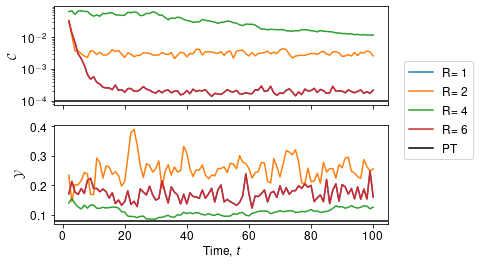

In [24]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=2, logC=True)
# plt.savefig("../figures/tri-1_R1-2-6_net-measures.pdf")

## Block - Z

### One initial excitation

In [461]:
blocks = "1234"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 6]
BC = "1-00"
IC = "f0"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True)

In [462]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [463]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [349]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

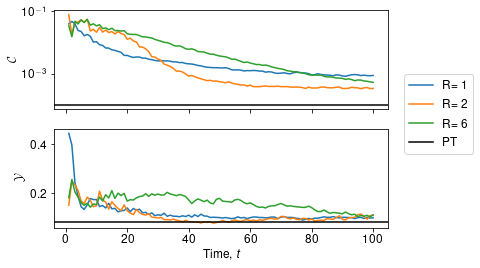

In [358]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, logC=True)

### Two initial excitiations

In [384]:
blocks = "1234"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f6-9"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True)

In [385]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [386]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [387]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [388]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

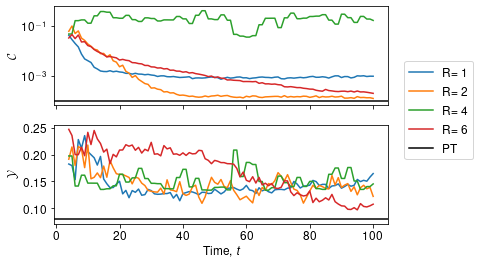

In [395]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=4, logC=True)

### Four initial excitations -- a

In [478]:
blocks = "1234"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f1-4-11-14"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True)

In [479]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [481]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [480]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [482]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

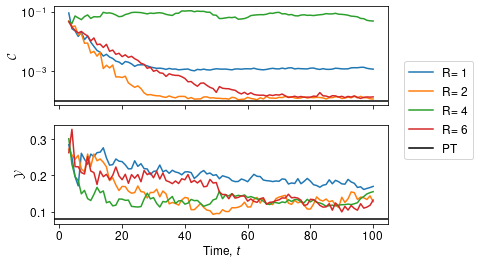

In [490]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=3, logC=True)

### Four initial excitations -- b

In [484]:
blocks = "1234"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f0-6-9-15"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True)

In [485]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [486]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [487]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [488]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

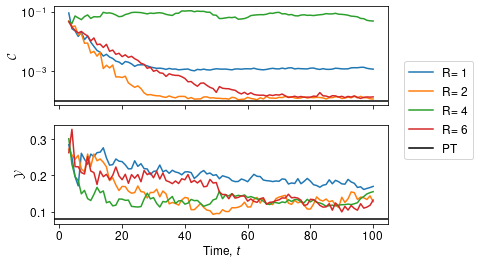

In [491]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, tmin=3, logC=True)

## Block - XX

### One initial excitation

In [350]:
blocks = "14131423"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 6]
BC = "1-00"
IC = "f0"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True,
              hamiltonian=False)

In [351]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [352]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [353]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [354]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

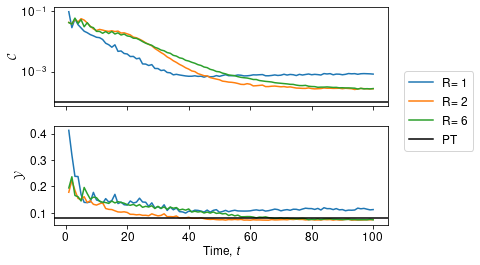

In [355]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, logC=True)

### Two initial excitations

In [79]:
blocks = "14131423"  # enable Margolus neighborhood block sequence 
Rs = [1, 2, 4, 6]
BC = "1-00"
IC = "f6-9"
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=12,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              blocks=blocks,
              totalistic=True,
              hamiltonian=False)

In [80]:
# Generate data and store as list of QCA objects
Qs = []
for R in Rs:
    p = copy(params)
    p["R"] = R
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [81]:
ani = grid_animation(Qs, "exp_Z")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [82]:
ani = grid_animation(Qs, "s_2")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

ValueError: Received invalid argument(s): alphs

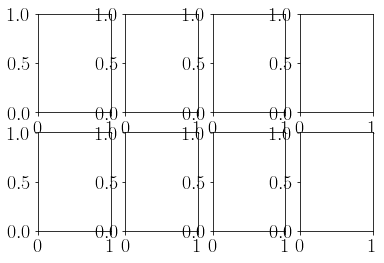

In [83]:
ani = network_animation(Qs, layout="grid")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

In [ ]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, logC=True)

# Rod neighborhoods (1-neighbor 1D QCA)

In [94]:
reimport()
rods = "1234"  # enable rod neighbors in parity update
R = 2
BC = "1-0"
ICs = ["f0", "f6-9", "f5-6-9", "f0-6-9-15", "f1-4-11-14"]
V = "h"

params = dict(
              L=16,
              Lx=4,
              T=100.0,
              dt=1.0,
              R=R,
              r=1,
              V=V,
              BC=BC,
              IC=IC,
              E=0.0,
              N=1,
              rods=rods,
              totalistic=True,
              hamiltonian=False)

In [95]:
# Generate data and store as list of QCA objects
Qs = []
for IC in ICs:
    p = copy(params)
    p["IC"] = IC
    Q = QCA(p, der=der)
    Q.run(tasks=["rhoj", "rhojk"], verbose=False)
    Qs.append(Q)

In [96]:
ani = grid_animation(Qs, "exp_Y", label="IC")
# ani.save("../figures/animation/tri-1_R1-2-6_exp_Z.mp4")
HTML(ani.to_html5_video())

In [97]:
ani = grid_animation(Qs, "s_2", label="IC")
# ani.save("../figures/animation/tri-1_R1-2-6_s_2.mp4")
HTML(ani.to_html5_video())

In [98]:
ani = network_animation(Qs, layout="grid", label="IC")
# ani.save("../figures/animation/tri-1_R1-2-6_network.mp4")
HTML(ani.to_html5_video())

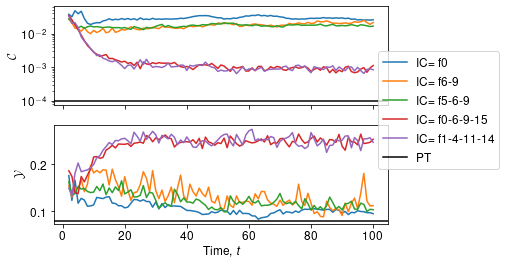

In [99]:
network_measures_plot(Qs, Cref=PT_C, Yref=PT_Y, logC=True, tmin=2, label="IC")

In [100]:
Cstate = make_state(16, "C4-4")
rhoj = ms.get_rhoj(Cstate)
PT_MI =  ms.get_MI_from_state(Cstate, order=2)
C_pagecurve = ms.get_entropy(ms.get_bipart(Cstate), order=2)
C_C = ms.network_clustering(PT_MI)
C_Y = ms.network_disparity(PT_MI)

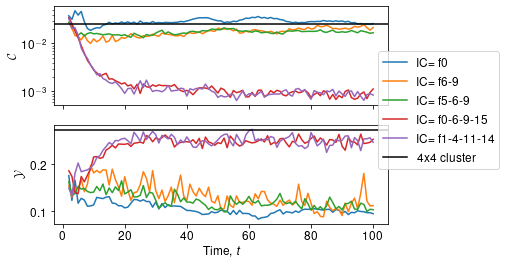

In [101]:
network_measures_plot(Qs, Cref=C_C, Yref=C_Y, logC=True, tmin=2, label="IC", reflabel="4x4 cluster")

In [102]:
for Q in Qs:
    Q.close()